<a href="https://colab.research.google.com/github/itsamekadio/Numerical_Methods_Course/blob/main/Week6(interpolatio_newton%2Blagrange).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

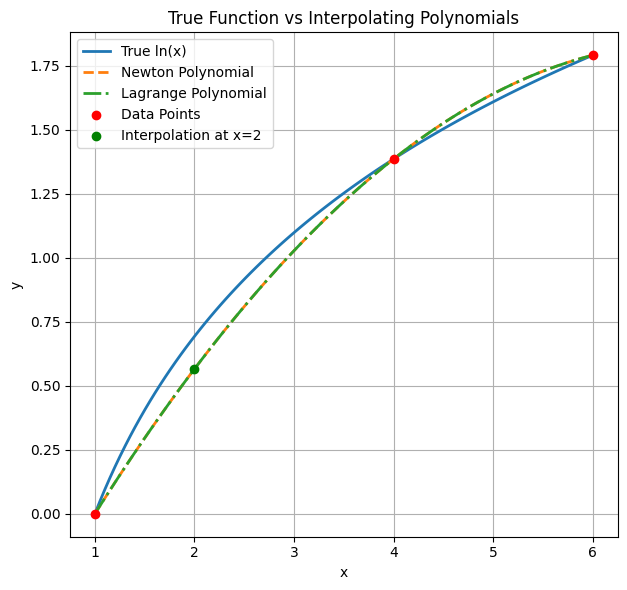

Newton Interpolation:
  Interpolated value at x=2: 0.5658443
  Absolute error: 0.1273028

Lagrange Interpolation:
  Interpolated value at x=2: 0.5658443
  Absolute error: 0.1273028


In [5]:
import numpy as np
import matplotlib.pyplot as plt

def newton_interpolate(x_data, y_data, xi):
    n = len(x_data) - 1
    fold = [y_data.copy()]
    for j in range(1, n + 1):
        current = []
        for i in range(n + 1 - j):
            numerator = fold[j-1][i+1] - fold[j-1][i]
            denominator = x_data[i + j] - x_data[i]
            current.append(numerator / denominator)
        fold.append(current)
    yint = fold[0][0]
    xterm = 1
    ea = []
    for order in range(1, n + 1):
        xterm *= (xi - x_data[order - 1])
        yint_new = yint + fold[order][0] * xterm
        ea.append(yint_new - yint)
        yint = yint_new
    return yint, ea, fold

def evaluate_newton_poly(x_data, fold, x_vals):
    n = len(x_data) - 1
    y_poly = []
    for x in x_vals:
        yint = fold[0][0]
        xterm = 1
        for order in range(1, n + 1):
            xterm *= (x - x_data[order - 1])
            yint += fold[order][0] * xterm
        y_poly.append(yint)
    return y_poly

def lagrange(x_data, y_data, xx):
    n = len(x_data) - 1
    sum_val = 0.0
    for i in range(n + 1):
        product = y_data[i]
        for j in range(n + 1):
            if i != j:
                product *= (xx - x_data[j]) / (x_data[i] - x_data[j])
        sum_val += product
    return sum_val

def evaluate_lagrange_poly(x_data, y_data, x_vals):
    return [lagrange(x_data, y_data, x) for x in x_vals]

x = [1, 4, 6]
y = [0, np.log(4), np.log(6)]
xi = 2

yint_newton, _, fold = newton_interpolate(x, y, xi)
y_poly_newton = evaluate_newton_poly(x, fold, np.linspace(1, 6, 100))

yint_lagrange = lagrange(x, y, xi)
y_poly_lagrange = evaluate_lagrange_poly(x, y, np.linspace(1, 6, 100))

x_vals = np.linspace(1, 6, 100)
y_true = np.log(x_vals)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_vals, y_true, label='True ln(x)', linewidth=2)
plt.plot(x_vals, y_poly_newton, '--', label='Newton Polynomial', linewidth=2)
plt.plot(x_vals, y_poly_lagrange, '-.', label='Lagrange Polynomial', linewidth=2)
plt.scatter(x, y, color='red', zorder=5, label='Data Points')
plt.scatter([xi], [yint_newton], color='green', zorder=5, label='Interpolation at x=2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('True Function vs Interpolating Polynomials')
plt.legend()
plt.grid(True)



plt.tight_layout()
plt.show()

print("Newton Interpolation:")
print(f"  Interpolated value at x={xi}: {yint_newton:.7f}")
print(f"  Absolute error: {np.abs(yint_newton - np.log(2)):.7f}\n")

print("Lagrange Interpolation:")
print(f"  Interpolated value at x={xi}: {yint_lagrange:.7f}")
print(f"  Absolute error: {np.abs(yint_lagrange - np.log(2)):.7f}")